In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import mglearn
from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(style="ticks")


In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))


Ключи cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [25]:
print(cancer.data.shape)
print(cancer['target_names'])
np.bincount(cancer.target)

(569, 30)
['malignant' 'benign']


array([212, 357], dtype=int32)

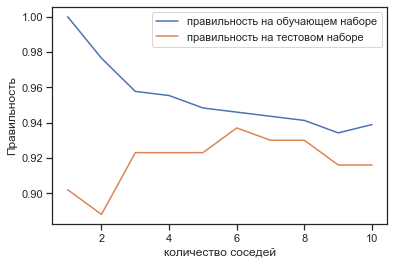

In [29]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
     # строим модель
     clf = KNeighborsClassifier(n_neighbors=n_neighbors)
     clf.fit(X_train, y_train)
     # записываем правильность на обучающем наборе
     training_accuracy.append(clf.score(X_train, y_train))
     # записываем правильность на тестовом наборе
     test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

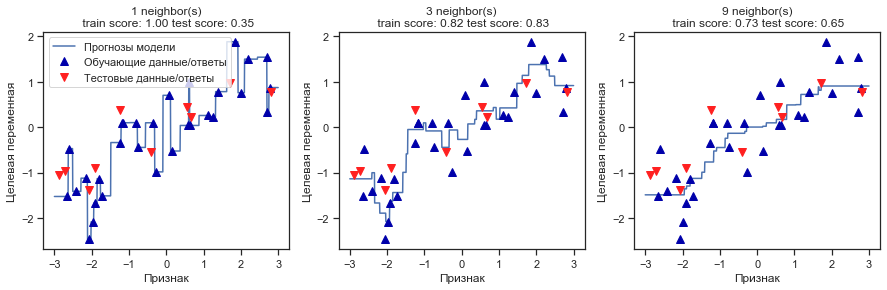

In [36]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
     # получаем прогнозы, используя 1, 3, и 9 соседей
     reg = KNeighborsRegressor(n_neighbors=n_neighbors)
     reg.fit(X_train, y_train)
     ax.plot(line, reg.predict(line))
     ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
     ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

     ax.set_title(
     "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
     n_neighbors, reg.score(X_train, y_train),
     reg.score(X_test, y_test)))
     ax.set_xlabel("Признак")
     ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
                "Тестовые данные/ответы"], loc="best")
